In [ ]:
import numpy as np
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')

    if np_path_XYs.ndim == 1:
        np_path_XYs = np_path_XYs.reshape(-1, 2)

    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink', 'brown', 'lime', 'olive', 'navy', 'teal']

    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], color=c, linewidth=2)

    ax.set_aspect('equal')
    plt.show()




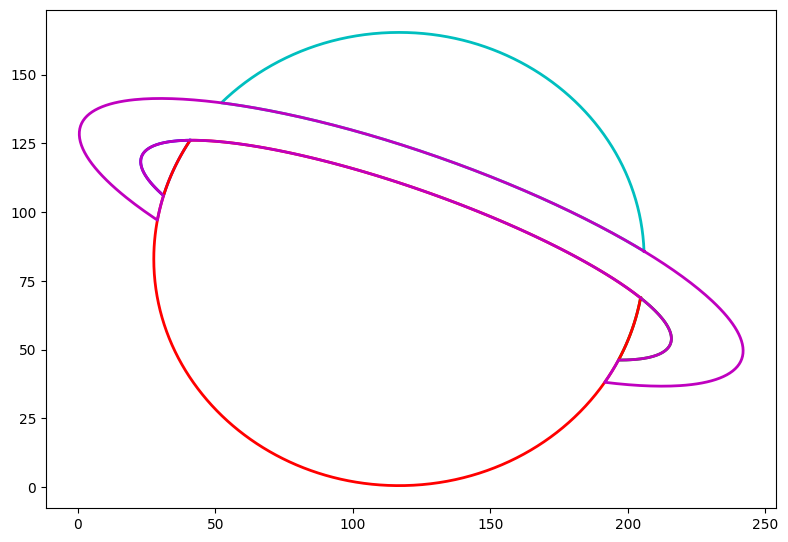

In [ ]:
y=read_csv('occlusion2.csv')
plot(y)

In [ ]:
!pip install cairosvg opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.1 MB/s eta 0:00:00


In [ ]:
import cairosvg
cairosvg.svg2png(url='frag0.svg', write_to='frag0.png')

In [ ]:
!pip install rdp

  Preparing metadata (setup.py) ... done
  Created wheel for rdp: filename=rdp-0.8-py3-none-any.whl size=4584 sha256=ac6fa2975a40630a702ef02e4631202aa90006e8f34de5cea31111f91126270e
  Stored in directory: /root/.cache/pip/wheels/5d/12/ec/0fc50553af000b9c3d2c74b9f77a01ae4bfe856e9917ac239c
Successfully built rdp


In [ ]:
!pip install tensorflow

# Trying To build a CNN model which can detect the doodle

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Unable to read image {image_path}")
        return None
    try:
        image = cv2.resize(image, (64, 64))
        image = image.astype('float32') / 255.0
        image = np.expand_dims(image, axis=-1)  # Add channel dimension for grayscale
    except cv2.error as e:
        print(f"Error processing image {image_path}: {e}")
        return None
    return image


In [ ]:
def load_dataset(directory):
    images = []
    labels = []
    label_map = {}

    for idx, category in enumerate(os.listdir(directory)):
        label_map[idx] = category
        folder_path = os.path.join(directory, category)
        if not os.path.exists(folder_path):
            print(f"Warning: Directory {folder_path} does not exist.")
            continue
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                file_path = os.path.join(folder_path, filename)
                image = preprocess_image(file_path)
                if image is not None:
                    images.append(image)
                    labels.append(idx)
                else:
                    print(f"Warning: Failed to process image {file_path}")

    images = np.array(images)
    labels = np.array(labels)
    return images, labels, label_map

# Load the dataset
dataset_directory = 'doodle_dataset'
X, y, label_map = load_dataset(dataset_directory)


FileNotFoundError: [Errno 2] No such file or directory: 'doodle_dataset'

In [ ]:
# One-hot encode the labels
num_classes = len(label_map)
y = to_categorical(y, num_classes=num_classes)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
input_shape = (64, 64, 1)  # Grayscale images have 1 channel
model = create_cnn_model(input_shape, num_classes)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 234ms/step - accuracy: 0.8662 - loss: 0.3170 - val_accuracy: 1.0000 - val_loss: 1.0575e-05
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 1.0000 - loss: 1.6922e-04 - val_accuracy: 1.0000 - val_loss: 2.9938e-06
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 1.0000 - loss: 1.0303e-04 - val_accuracy: 1.0000 - val_loss: 5.7958e-06
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 224ms/step - accuracy: 1.0000 - loss: 1.0632e-04 - val_accuracy: 1.0000 - val_loss: 4.5470e-06
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 215ms/step - accuracy: 1.0000 - loss: 1.0303e-04 - val_accuracy: 1.0000 - val_loss: 9.5027e-07
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 1.0000 - loss: 4.7807e-05 - val_accuracy: 1.0000 - val_loss: 6.0551e-07
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 241ms/step - accuracy: 1.0000 - loss: 8.6962e-05 - val_accuracy: 1.0000 - val_loss: 1.2489e-06
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 215

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}")


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 1.0000 - loss: 4.2289e-08
Test accuracy: 1.0000, Test loss: 0.0000


In [ ]:
def predict_doodle(image_path, model, label_map):
    image = preprocess_image(image_path)
    if image is None:
        print("Error processing the image.")
        return
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    print(f"Predicted doodle: {label_map[predicted_class]}")

# Example usage
predict_doodle('path_to_your_doodle_image.png', model, label_map)


NameError: name 'label_map' is not defined

In [ ]:
def visualize_prediction(image_path, model, label_map):
    image = preprocess_image(image_path)
    if image is None:
        print("Error processing the image.")
        return
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)

    plt.imshow(np.squeeze(image), cmap='gray')
    plt.title(f"Predicted: {label_map[predicted_class]}")
    plt.axis('off')
    plt.show()

# Example usage
visualize_prediction('path_to_your_doodle_image.png', model, label_map)


# Shape Detection

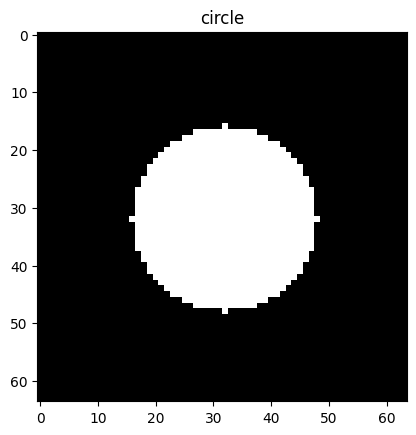

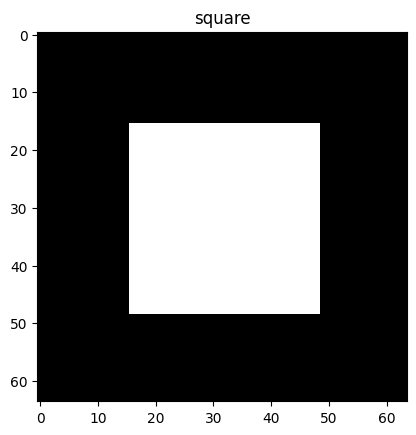

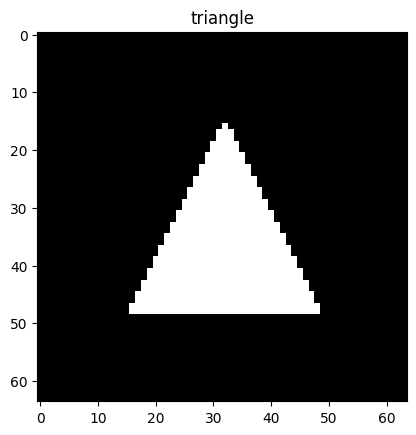

In [ ]:
import cv2
import numpy as np
import os

def generate_shape(shape_type, image_size=(64, 64), overlap=False):
    image = np.zeros(image_size, dtype=np.uint8)

    if shape_type == 'circle':
        center = (image_size[1] // 2, image_size[0] // 2)
        radius = min(image_size) // 4
        cv2.circle(image, center, radius, 255, -1)

    elif shape_type == 'square':
        side = min(image_size) // 2
        top_left = (image_size[1] // 4, image_size[0] // 4)
        cv2.rectangle(image, top_left, (top_left[0] + side, top_left[1] + side), 255, -1)

    elif shape_type == 'triangle':
        pts = np.array([[image_size[1] // 2, image_size[0] // 4],
                        [image_size[1] // 4, 3 * image_size[0] // 4],
                        [3 * image_size[1] // 4, 3 * image_size[0] // 4]], np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.fillPoly(image, [pts], 255)

    if overlap:
        # Add an overlapping shape
        cv2.circle(image, (image_size[1] // 4, image_size[0] // 4), min(image_size) // 8, 255, -1)

    return image

# Example: Generate images and display them
shapes = ['circle', 'square', 'triangle']
for shape in shapes:
    img = generate_shape(shape)
    plt.imshow(img, cmap='gray')
    plt.title(f"{shape}")
    plt.show()


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
def load_synthetic_shapes(num_samples=1000, image_size=(64, 64), overlap=False):
    shapes = ['circle', 'square', 'triangle']
    images = []
    labels = []

    for label, shape in enumerate(shapes):
        for _ in range(num_samples):
            img = generate_shape(shape, image_size=image_size, overlap=overlap)
            images.append(img)
            labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    # Normalize and add channel dimension
    images = images.astype('float32') / 255.0
    images = np.expand_dims(images, axis=-1)

    return images, labels

# Load synthetic shape data
X, y = load_synthetic_shapes(num_samples=1000, overlap=True)
y = to_categorical(y, num_classes=3)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the input shape and number of classes
input_shape = (64, 64, 1)  # Grayscale images have 1 channel
num_classes = 3  # Circle, Square, Triangle

# Create and train the model
model = create_cnn_model(input_shape, num_classes)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.3)


In [ ]:
input_shape = (64, 64, 1)  # Grayscale images
model = create_cnn_model(input_shape, num_classes=3)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.3)


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - accuracy: 0.8588 - loss: 0.3061 - val_accuracy: 1.0000 - val_loss: 4.5069e-06
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - accuracy: 1.0000 - loss: 2.0704e-04 - val_accuracy: 1.0000 - val_loss: 9.0523e-07
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 234ms/step - accuracy: 1.0000 - loss: 1.0336e-04 - val_accuracy: 1.0000 - val_loss: 6.2594e-07
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 224ms/step - accuracy: 1.0000 - loss: 6.1829e-05 - val_accuracy: 1.0000 - val_loss: 3.1297e-07
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 228ms/step - accuracy: 1.0000 - loss: 4.0935e-05 - val_accuracy: 1.0000 - val_loss: 1.9641e-07
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 224ms/step - accuracy: 1.0000 - loss: 2.1429e-05 - val_accuracy: 1.0000 - val_loss: 1.5440e-07
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 230ms/step - accuracy: 1.0000 - loss: 4.9191e-05 - val_accuracy: 1.0000 - val_loss: 8.1365e-08
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 190